<a href="https://colab.research.google.com/github/MuradovMaks/Blur_Face_CV/blob/main/Blur_face%20for%20Johny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

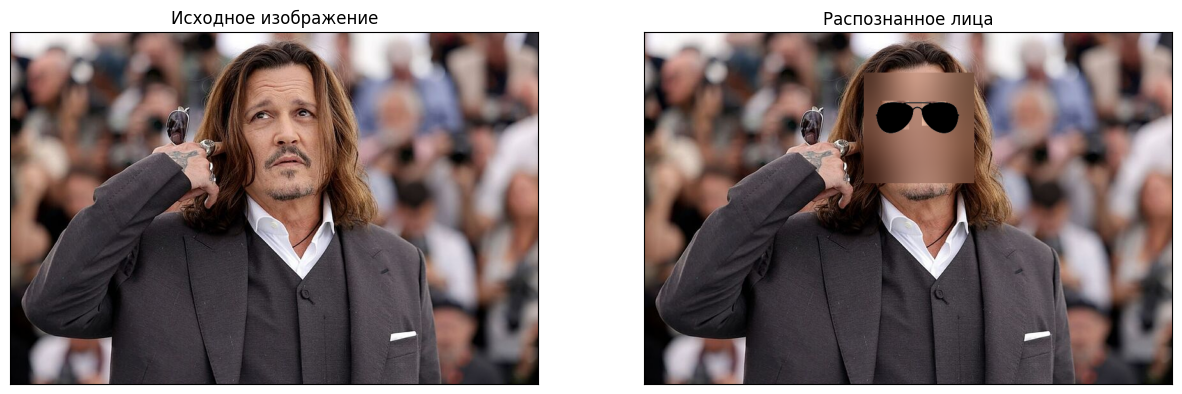

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot

#Загрузим каскады хаара
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")


image = cv2.imread('/content/Johny.jpg')
img2 = image.copy()
glass_img = cv2.imread('/content/1.jfif')

# Определим центр очков


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
centers = []

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    face_region = image[y:y+h, x:x+w]
    face_gray = gray[y:y+h, x:x+w]

    # Обнаружьте глаза в области лица
    eyes = eye_cascade.detectMultiScale(face_gray)

    # Создайте маску для глаз
    mask = cv2.bitwise_not(cv2.inRange(face_region, (0, 0, 0), (0, 0, 0)))

    for (ex, ey, ew, eh) in eyes:
        # Обновите маску, чтобы оставить глаза неразмытыми
        mask[ey:ey+eh, ex:ex+ew] = 0

    # Примените размытие ко всему лицу
    blurred_face = cv2.GaussianBlur(face_region, (99, 99), 30)

    # Объедините размытое лицо с оригинальной областью глаз
    face_region = cv2.bitwise_and(blurred_face, blurred_face, mask=mask)
    face_region += cv2.bitwise_and(image[y:y+h, x:x+w], image[y:y+h, x:x+w], mask=cv2.bitwise_not(mask))

    # Поместите обработанную область обратно на изображение
    image[y:y+h, x:x+w] = face_region

    for (ex, ey, ew, eh) in eyes:
        centers.append((x + int(ex + 0.6 * ew ), y + int(ey + 0.5 * eh)))

if len(centers) > 0:
    glasses_width = 2.2 * abs(centers[1][0] - centers[0][0])
    overlay_img = np.ones(image.shape, np.uint8) * 255
    h, w = glass_img.shape[:2]
    scaling_factor = glasses_width / w
    overlay_glasses = cv2.resize(glass_img, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

    x = centers[0][0] if centers[0][0] < centers[1][0] else centers[1][0]
    x -= 0.26 * overlay_glasses.shape[1]
    y += 0.95 * overlay_glasses.shape[0]

    h, w = overlay_glasses.shape[:2]
    overlay_img[int(y):int(y + h), int(x):int(x + w)] = overlay_glasses

    gray_glasses = cv2.cvtColor(overlay_img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray_glasses, 130, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    temp = cv2.bitwise_and(image, image, mask=mask)
    temp2 = cv2.bitwise_and(overlay_img, overlay_img, mask=mask_inv)

    final_img = cv2.add(temp, temp2)
    final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(final_img)
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лица')

pyplot.show()

